# Law of large numbers
if you sample distribution the large number of times the measured observed averaged value should converge to the true expectation value.
$ \bar{x}_{n}=\frac{X_1+X_2+..+X_n}{n}\rightarrow \mu$ <br>

Example: fair coin tossing, the proportion of heads should approache 0.5 after many tosses



## Apply law of the large numbers to Exponentional distribution

mean=1.0,var=1.0,skew=2.0,kurt=6.0


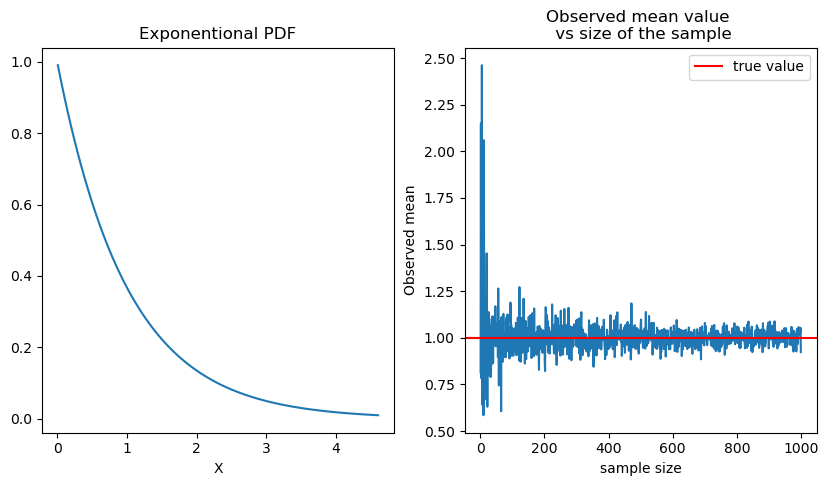

In [53]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2,figsize=(10,5))

rv = expon()

# plot exponentional distribution 
x=np.linspace(rv.ppf(0.01),expon.ppf(0.99),100)
y=expon.pdf(x)
ax[0].plot(x,y)
ax[0].set_title("Exponentional PDF")
ax[0].set_xlabel('X')


###  calculate statistics
mean, var, skew, kurt = expon.stats(moments='mvsk')
print("mean={},var={},skew={},kurt={}".format(mean,var,skew,kurt))

### subset random variable
X=[]
Y=[]
for i in range(1,1000): # i denote the subset size
    N=i
    r = rv.rvs(size=N)
    X.append(N)
    Y.append(r.mean())

ax[1].plot(X,Y)
ax[1].axhline(y = mean, color = 'r', linestyle = '-',label='true value')
ax[1].set_title("Observed mean value \n vs size of the sample")
ax[1].set_ylabel("Observed mean")
ax[1].set_xlabel("sample size")
plt.legend();


# Central limit theorem
If you repeatedly sample random variable large number of times, the  distribution of sample mean will aproach normal distribution regadless of the initial distribution <br>
$\bar{x}_{n}=\frac{X_1+X_2+..+X_n}{n}$ approach $ N(\mu,\frac{\sigma^{2}}{n})$


### Test Central limit theorem on Beta distribution

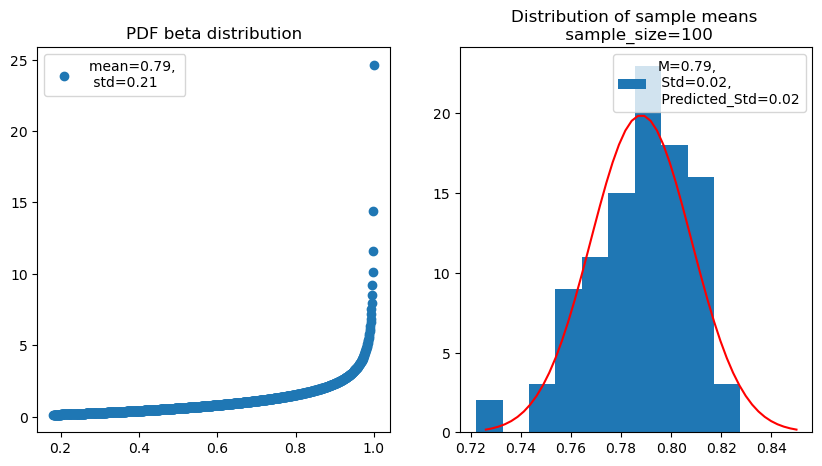

In [71]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt

# define highly skewed distribution
a, b = 2.31, 0.627
bd=beta(a,b)
x=np.linspace(bd.ppf(0.01),bd.ppf(0.99),1000)
y=bd.pdf(x)

# plot beta distribution
fig, ax = plt.subplots(1, 2,figsize=(10,5))
ax[0].plot(x,y,'o',label='mean={:.2f}, \n std={:.2f}'.format(mean,bd.std()))
ax[0].legend()
ax[0].set_title("PDF beta distribution")
mean, var, skew, kurt=bd.stats(moments='mvsk')
#print('mean={},std={}'.format(mean,bd.std()))

# sample distribution
sample_size=100
sample_mean=[]
for i in range(100):
    sample=bd.rvs(sample_size)
    sample_mean.append(sample.mean())

# calculate statistics based on distribution of sample means
sample_mean=np.array(sample_mean)
predicted_std=bd.std()/np.sqrt(sample_size)


ax[1].hist(sample_mean,label="M={:.2f},\n Std={:.2f},\n Predicted_Std={:.2f}".format(np.mean(sample_mean),np.std(sample_mean),predicted_std))
ax[1].legend()
ax[1].set_title("Distribution of sample means \n sample_size={}".format(sample_size));
#print("observed M={:.2f}, Std={:.2f}, Predicted_Std={:.2f}".format(np.mean(sample_mean),np.std(sample_mean),predicted_std))


# fit norm distribution to the sample statistics
mean,std=norm.fit(sample_mean)
nn=norm(loc=mean,scale=std)
x=np.linspace(nn.ppf(0.001),nn.ppf(0.999))
y=nn.pdf(x)
ax[1].plot(x,y,color='red')



### Test normality
* graphical way qq-plot
* Kolmogorov-Smirnov
* Shapiro-Wilks

### QQ-plot
https://www.statology.org/q-q-plot-python/